In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = 'all'
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'L2hvbWUvb3Jlbi93b3JrL25vdGVzL25vdGVzLW5scC9ub3Rlcy9jM3cz'
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
globals()["__spec__"] = None

/tmp/ipykernel_120031/3459683649.py:25: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats(fig_format)


{"/usr/lib/python3.10/importlib/_bootstrap.py": 1737124534.0, "/usr/lib/python3.10/importlib/_bootstrap_external.py": 1737124534.0, "/usr/lib/python3.10/codecs.py": 1737124534.0, "/usr/lib/python3.10/encodings/aliases.py": 1737124534.0, "/usr/lib/python3.10/encodings/__init__.py": 1737124534.0, "/usr/lib/python3.10/encodings/utf_8.py": 1737124534.0, "/usr/lib/python3.10/abc.py": 1737124534.0, "/usr/lib/python3.10/io.py": 1737124534.0, "/usr/lib/python3.10/stat.py": 1737124534.0, "/usr/lib/python3.10/_collections_abc.py": 1737124534.0, "/usr/lib/python3.10/genericpath.py": 1737124534.0, "/usr/lib/python3.10/posixpath.py": 1737124534.0, "/usr/lib/python3.10/os.py": 1737124534.0, "/usr/lib/python3.10/_sitebuiltins.py": 1737124534.0, "/usr/lib/python3.10/types.py": 1737124534.0, "/usr/lib/python3.10/warnings.py": 1737124534.0, "/usr/lib/python3.10/importlib/__init__.py": 1737124534.0, "/usr/lib/python3.10/importlib/_abc.py": 1737124534.0, "/usr/lib/python3.10/keyword.py": 1737124534.0, "/u

In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

Text(0.5, 1.0, 'Sigmoid Steepest Point')

Text(0.5, 0, 'x input data')

Text(0, 0.5, 'sigmoid(x)')

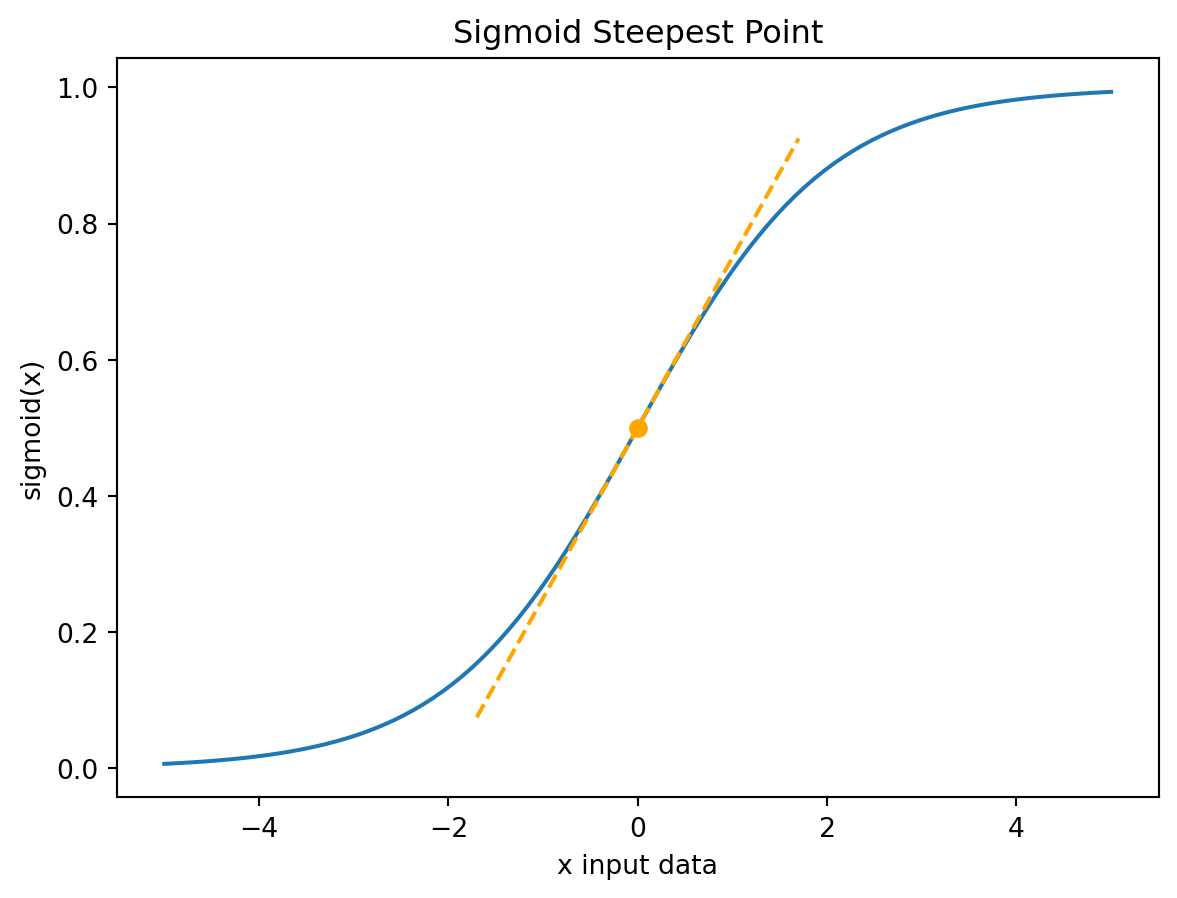

In [3]:
# Data
# Interval [-5, 5]
### START CODE HERE ###
x = np.linspace(-5, 5, 100)  # try changing the range of values in the data. eg: (-100,100,1000)
### END CODE HERE ###
# Activation
# Interval [0, 1]
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

activations = sigmoid(x)

# Gradient
# Interval [0, 0.25]
def sigmoid_gradient(x):
    return (x) * (1 - x)

gradients = sigmoid_gradient(activations)

# Plot sigmoid with tangent line
plt.plot(x, activations)
plt.title("Sigmoid Steepest Point")
plt.xlabel("x input data")
plt.ylabel("sigmoid(x)")

# Add the tangent line
### START CODE HERE ###
x_tan = 0   # x value to find the tangent. try different values within x declared above. eg: 2  
### END CODE HERE ###
y_tan = sigmoid(x_tan)  # y value
span = 1.7              # line span along x axis
data_tan = np.linspace(x_tan - span, x_tan + span)  # x values to plot
gradient_tan = sigmoid_gradient(sigmoid(x_tan))     # gradient of the tangent
tan = y_tan + gradient_tan * (data_tan - x_tan)     # y values to plot
plt.plot(x_tan, y_tan, marker="o", color="orange", label=True)  # marker
plt.plot(data_tan, tan, linestyle="--", color="orange")         # line
plt.show()

Text(0.5, 1.0, 'x values')

Text(0, 0.5, 'y=x')

Text(0.5, 0, 'x input data')

Text(0.5, 1.0, 'sigmoid')

Text(0, 0.5, 'sigmoid')

Text(0.5, 0, 'x input data')

Text(0.5, 1.0, 'sigmoid gradient')

Text(0, 0.5, 'gradient')

Text(0.5, 0, 'x input data')

/tmp/ipykernel_120031/2272590038.py:22: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


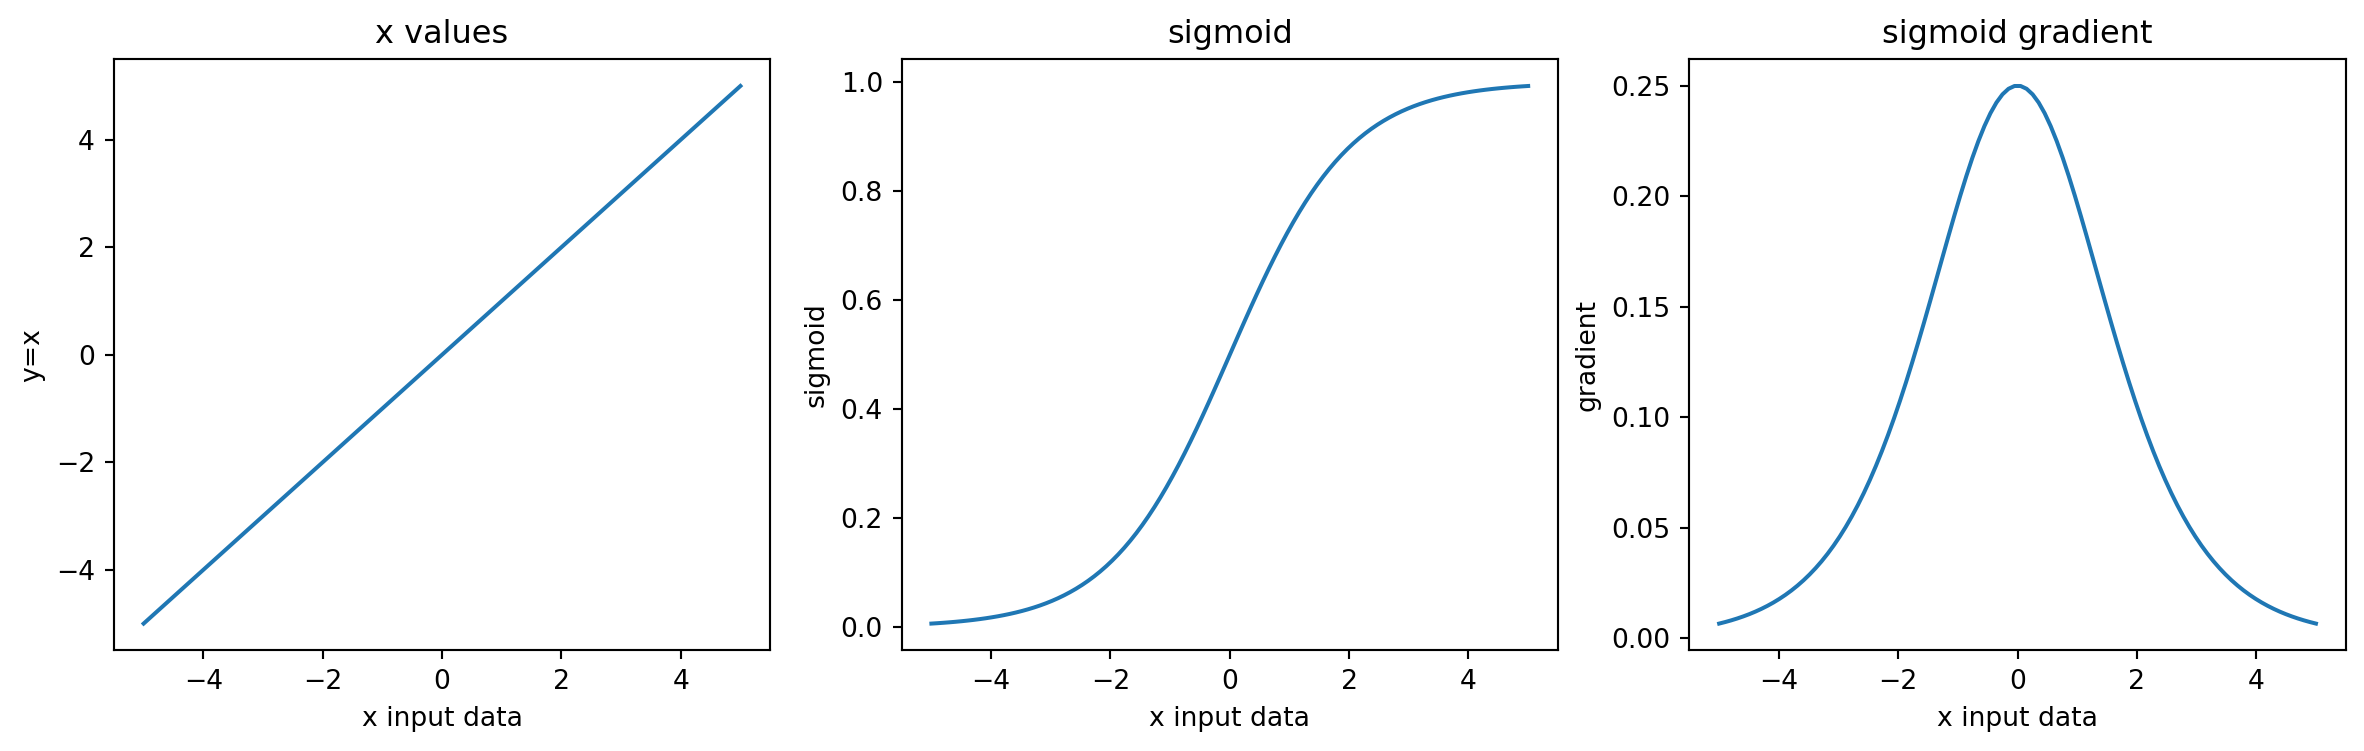

In [4]:
# Sub plots
fig, axs = plt.subplots(1, 3, figsize=(15, 4), sharex=True)

# X values
axs[0].plot(x, x)
axs[0].set_title("x values")
axs[0].set_ylabel("y=x")
axs[0].set_xlabel("x input data")

# Sigmoid
axs[1].plot(x, activations)
axs[1].set_title("sigmoid")
axs[1].set_ylabel("sigmoid")
axs[1].set_xlabel("x input data")

# Sigmoid gradient
axs[2].plot(x, gradients)
axs[2].set_title("sigmoid gradient")
axs[2].set_ylabel("gradient")
axs[2].set_xlabel("x input data")

fig.show()

Text(0.5, 1.0, 'Visualizing Compression')

Text(0.5, 0, 'x input data')

Text(0, 0.5, 'range')

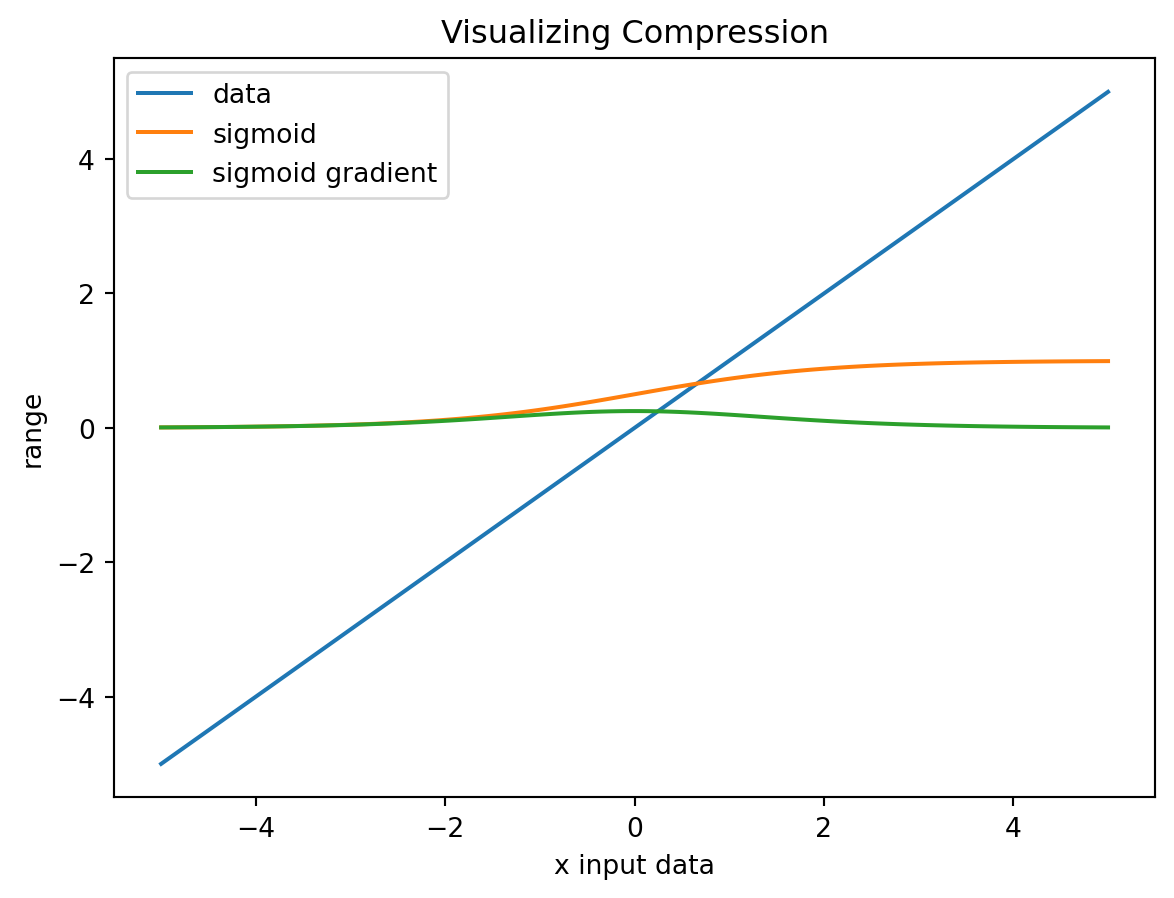


Max of x data : 5.0
Min of x data : -5.0 

Max of sigmoid : 0.993
Min of sigmoid : 0.007 

Max of gradients : 0.250
Min of gradients : 0.007


In [5]:
# Single plot
plt.plot(x, x, label="data")
plt.plot(x, activations, label="sigmoid")
plt.plot(x, gradients, label="sigmoid gradient")
plt.legend(loc="upper left")
plt.title("Visualizing Compression")
plt.xlabel("x input data")
plt.ylabel("range")
### START CODE HERE ###
# plt.ylim(-.5, 1.5)    # try shrinking the y axis limit for better visualization. eg: uncomment this line
### END CODE HERE ###
plt.show()

# Max, Min of each array
print("")
print("Max of x data :", np.max(x))
print("Min of x data :", np.min(x), "\n")
print("Max of sigmoid :", "{:.3f}".format(np.max(activations)))
print("Min of sigmoid :", "{:.3f}".format(np.min(activations)), "\n")
print("Max of gradients :", "{:.3f}".format(np.max(gradients)))
print("Min of gradients :", "{:.3f}".format(np.min(gradients)))

-- Inputs --
steps : 6
x value : 0
sigmoid : 0.50000
gradient : 0.25000 

-- Loop --
step 1 : 0.25
step 2 : 0.0625
step 3 : 0.015625
step 4 : 0.00390625
step 5 : 0.0009765625
step 6 : 0.000244140625



([<matplotlib.axis.XTick at 0x7edb9179aa10>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6')])

Text(0.5, 1.0, 'Multiplying Small Numbers')

Text(0.5, 0, 'Steps')

Text(0, 0.5, 'Cumulative Gradient')

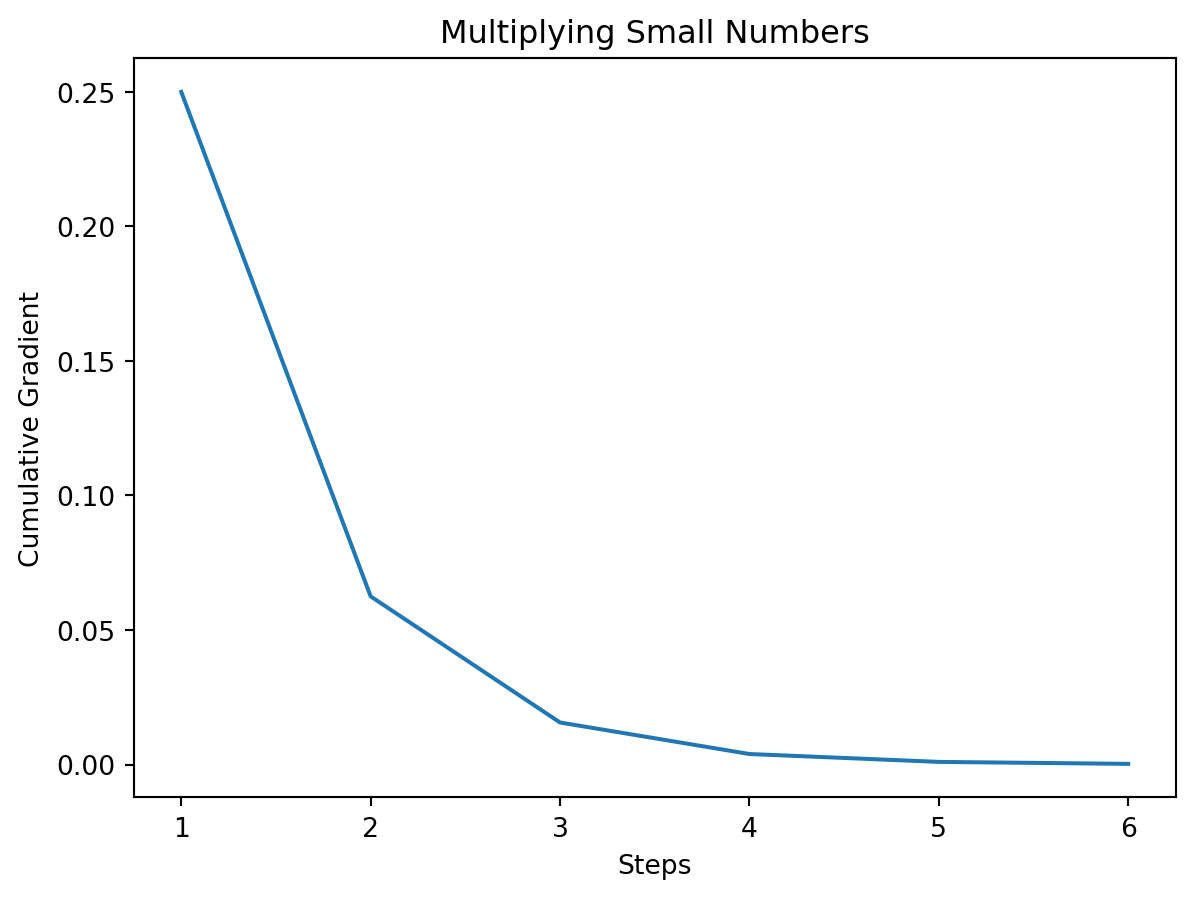

In [6]:
# Simulate decay
# Inputs
### START CODE HERE ###
n = 6  # number of steps : try changing this
x = 0  # value for input x : try changing this
### END CODE HERE ###
grad = sigmoid_gradient(sigmoid(x))
steps = np.arange(1, n + 1)
print("-- Inputs --")
print("steps :", n)
print("x value :", x)
print("sigmoid :", "{:.5f}".format(sigmoid(x)))
print("gradient :", "{:.5f}".format(grad), "\n")

# Loop to calculate cumulative total
print("-- Loop --")
vals = []
total_grad = 1  # initialize to 1 to satisfy first loop below
for s in steps:
    total_grad = total_grad * grad
    vals.append(total_grad)
    print("step", s, ":", total_grad)

print("")

# Plot
plt.plot(steps, vals)
plt.xticks(steps)
plt.title("Multiplying Small Numbers")
plt.xlabel("Steps")
plt.ylabel("Cumulative Gradient")
plt.show()